## Introduction to Matplotlib

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
plt.plot();

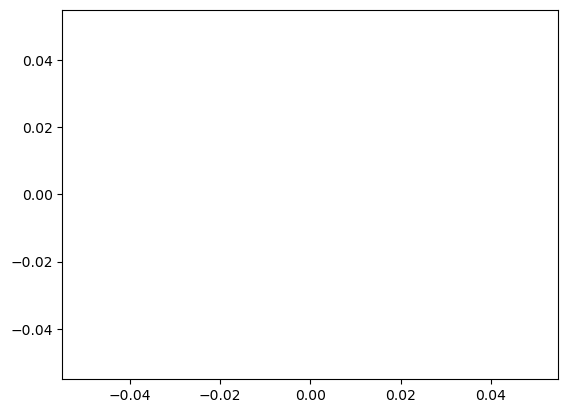

In [3]:
plt.plot()  # does the same as above 
plt.show()

Add some data

In [4]:
x = [2,4,6,8,10]
y = [10,30,55,73,92]
plt.plot(x,y)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

Creating plots

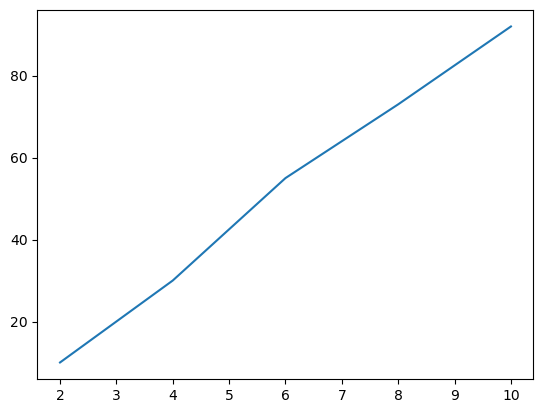

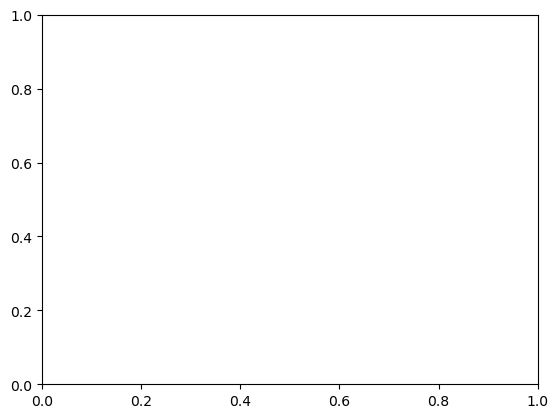

In [5]:
# 1st method 
fig = plt.figure() # creates a figure 
ax = fig.add_subplot() # adds some axes
plt.show()

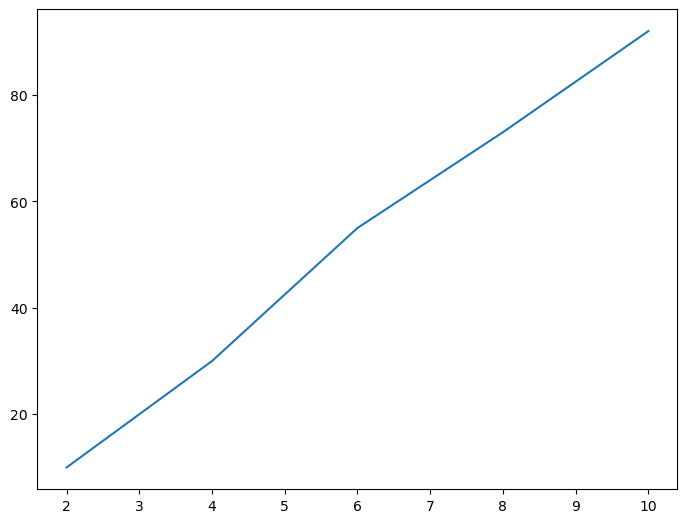

In [6]:
# second method
fig = plt.figure() #creates a figure
ax = fig.add_axes([1,1,1,1])
ax.plot(x,y)
plt.show()

In [7]:
# 3rd method (recommended)
fig, ax = plt.subplots() #subplot are more than one plot at the same time
ax.plot(x,y);

### 2. Matplotlib Workflow

In [8]:
# 0. Import matplotlib and get it ready for plotting on Jupyter
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Prepare data 
x = [2,4,6,8,10]
y = [10,30,55,73,92]

# 2. Set up plot
fig, ax = plt.subplots(figsize=(6,6))

# 3. plot data 
ax.plot(x,y);

# 4. Customize plot 
ax.set(title="Simple Plot",
       xlabel="x-axis",
       ylabel="y-axis")

# 5. To save the plot 
fig.savefig("figname")

### Making figures with NumPy arrays
* Line plot
* Scatter plot
* Bar plot
* Histogram
* Subplot

In [9]:
import numpy as np

In [10]:
# Create some data 
x = np.linspace(0,10,100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

In [11]:
# Plot the data and create a line plot
fig, ax = plt.subplots() 
ax.plot(x, x**2);

In [12]:
# Use same data to create a scatter plot 
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));

In [13]:
# another scatter plot 
fig , ax = plt.subplots()
ax.scatter(x, np.sin(x));

In [14]:
# make a plot from a dictionary and plit a bar
sales_data = {
    "Laptops": 150,
    "Smartphones": 240,
    "Headphones": 320,
    "Tablets": 180
}
fig , ax = plt.subplots()
ax.bar(sales_data.keys(), sales_data.values())
ax.set(title="Computer Mart",ylabel='Electronics available');


In [15]:
# Horzontal bars 
fig , ax = plt.subplots()
ax.barh(list(sales_data.keys()), list(sales_data.values()))
ax.set(title="Computer Mart",ylabel='Electronics available');

In [16]:
# Create some random data and plot a histogram
x = np.random.randn(1000)
fig, ax = plt.subplots()
ax.hist(x);

### Two options for subplots

In [17]:
# Subplot option 1
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,
                                            ncols=2,
                                            figsize=(10,5))

# add some data 
ax1.plot(x, x/2)
ax2.scatter(x, np.sin(x));
ax3.bar(sales_data.keys(), sales_data.values())
ax4.hist(np.random.randn(1000))

(array([  3.,  12.,  58., 136., 205., 268., 182.,  91.,  36.,   9.]),
 array([-3.40666421, -2.76157365, -2.1164831 , -1.47139254, -0.82630198,
        -0.18121142,  0.46387913,  1.10896969,  1.75406025,  2.39915081,
         3.04424136]),
 <BarContainer object of 10 artists>)

### Plotting from a Pandas DataFrame

In [18]:
timeseries = pd.Series(np.random.randn(1000),
              index=pd.date_range('1/1/2024', periods=1000))
timeseries

2024-01-01   -1.066890
2024-01-02    0.415005
2024-01-03    0.224098
2024-01-04   -1.692333
2024-01-05    1.462063
                ...   
2026-09-22   -1.780995
2026-09-23    0.917566
2026-09-24   -2.120285
2026-09-25   -1.220872
2026-09-26   -1.081013
Freq: D, Length: 1000, dtype: float64

In [19]:
timeseries.cumsum().plot(kind="line");


In [20]:
#import carsales data
car_sales = pd.read_csv("../ml-essentials/data/car-sales.csv")

# Rmove the price column symbols 
#car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '', regex=True)
car_sales["Price"] = car_sales["Price"].str.replace(r'[\$,\.]', '', regex=True)

car_sales


,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [21]:
# Remove the last two zeros
car_sales["Price"] = car_sales["Price"].str[:-2]
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [22]:
# add a date columns
car_sales["Sale Date"] = pd.date_range('1/1/2024', periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2024-01-01
1,Honda,Red,87899,4,5000,2024-01-02
2,Toyota,Blue,32549,3,7000,2024-01-03
3,BMW,Black,11179,5,22000,2024-01-04
4,Nissan,White,213095,4,3500,2024-01-05
5,Toyota,Green,99213,4,4500,2024-01-06
6,Honda,Blue,45698,4,7500,2024-01-07
7,Honda,Blue,54738,4,7000,2024-01-08
8,Toyota,White,60000,4,6250,2024-01-09
9,Nissan,White,31600,4,9700,2024-01-10


In [23]:
# make a total sales column 
type(car_sales["Price"][0]) # str . Needs to be changed to an interger
car_sales["Total Sales"] = car_sales["Price"].astype(int).cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2024-01-01,4000
1,Honda,Red,87899,4,5000,2024-01-02,9000
2,Toyota,Blue,32549,3,7000,2024-01-03,16000
3,BMW,Black,11179,5,22000,2024-01-04,38000
4,Nissan,White,213095,4,3500,2024-01-05,41500
5,Toyota,Green,99213,4,4500,2024-01-06,46000
6,Honda,Blue,45698,4,7500,2024-01-07,53500
7,Honda,Blue,54738,4,7000,2024-01-08,60500
8,Toyota,White,60000,4,6250,2024-01-09,66750
9,Nissan,White,31600,4,9700,2024-01-10,76450


In [24]:
# lets plot the total sales 
car_sales.plot(x="Sale Date", y="Total Sales");

In [25]:
# Bar plot - look at your dataframe and just decide what goes into the x and y ie what is being compared

car_sales.plot(x="Make", y="Odometer (KM)", kind="bar");

In [26]:
#create a new column that combines the price and make and plot it vs the odometer 
car_sales['Price_Make'] = car_sales['Price'].astype(str) + ' (' + car_sales['Make'] + ')'
car_sales.plot(x='Price_Make', y="Odometer (KM)", kind="bar");
plt.xlabel("Price (Make)")
plt.ylabel("Odometer (KM)")
plt.title("Price and Make vs Odometer (KM)")

Text(0.5, 1.0, 'Price and Make vs Odometer (KM)')

In [27]:
# Lets use another dataset
heart_disease = pd.read_csv("../ml-essentials/data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
# check the age distribution using a histogram
heart_disease['age'].plot.hist();
plt.xlabel("Age")
plt.ylabel("Age Frequency");

### What should you use? (Pyplot vs matplotlib OO method)
- When plotting sth quickly use pyplot
- When plotting sth more advanced, use the OO method


In [29]:
# Get patients over 50
over_50 = heart_disease[heart_disease['age'] > 50]
over_50.head(10)
len(over_50)

208

In [30]:
# get the number of those with a traget of 1 == sick
sick = heart_disease[heart_disease['target']==1 ]
sick.head()
len(sick)

165

In [31]:
# using pyplot method 
over_50.plot(kind="scatter",
            x="age",
            y="chol",
            c="target");

In [35]:
# OO method
fig, ax = plt.subplots(figsize=(10,6))
over_50.plot(kind="scatter",
            x="age",
            y="chol",
            c="target",
            ax=ax);

In [36]:
## Object Oriented method from scratch 
fig, ax = plt.subplots(figsize=(10,6))

# Plot the data 
scatter = ax.scatter(x=over_50["age"],
                    y=over_50["chol"],
                    c=over_50["target"])

# customize the plot
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol");

# setup a legend to make sense of the dots 
ax.legend(*scatter.legend_elements(),
         title="Target");

In [34]:
# Setup plot (2 rows, 1 column)
fig, (ax0, ax1) = plt.subplots(nrows=2, # 2 rows
                               ncols=1, # 1 column 
                               sharex=True, # both plots should use the same x-axis 
                               figsize=(10, 8))

# ---------- Axis 0: Heart Disease and Cholesterol Levels ----------

# Add data for ax0
scatter = ax0.scatter(over_50["age"], 
                      over_50["chol"], 
                      c=over_50["target"])
# Customize ax0
ax0.set(title="Heart Disease and Cholesterol Levels",
        ylabel="Cholesterol")
ax0.legend(*scatter.legend_elements(), title="Target")

# ---------- Axis 1: Heart Disease and Max Heart Rate Levels ----------

# Add data for ax1
scatter = ax1.scatter(over_50["age"], 
                      over_50["thalach"], 
                      c=over_50["target"])

# Customize ax1
ax1.set(title="Heart Disease and Max Heart Rate Levels",
        xlabel="Age",
        ylabel="Max Heart Rate")
ax1.legend(*scatter.legend_elements(), title="Target")

# Title the figure
fig.suptitle('Heart Disease Analysis', 
             fontsize=16, 
             fontweight='bold');